In [71]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from implementations import *
from EDA import *
from losses import *
from crossvalidation import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [36]:
DATA_TRAIN_PATH = "../data/train.csv"
y, data_set, ids = load_csv_data(DATA_TRAIN_PATH)

In [37]:
# Fixing the seed
seed = 8

## Exploration of the data

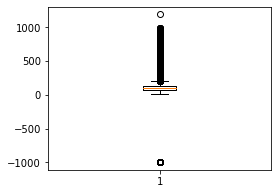

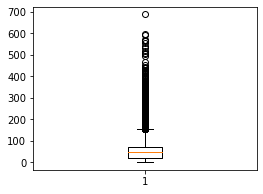

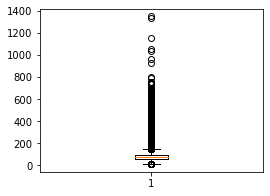

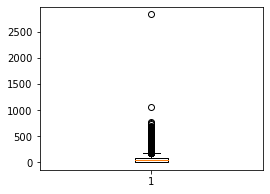

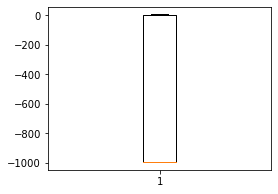

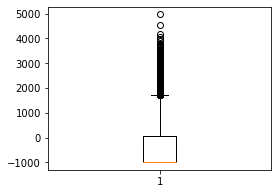

In [38]:
'''boxplot of some features to get an idea of the distribution'''
plt.figure(figsize=(4,3))
plt.boxplot(data_set[:,0])
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(data_set[:,1])
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(data_set[:,2])
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(data_set[:,3])
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(data_set[:,4])
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(data_set[:,5])
plt.show()

In [25]:
ind_y_neg = np.array(np.where(y == -1)[0])
ind_y_pos = np.array(np.where(y == 1)[0])

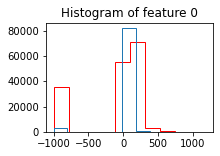

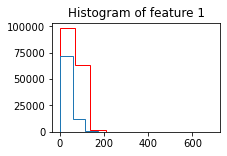

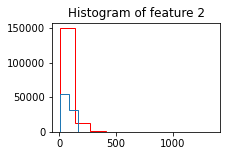

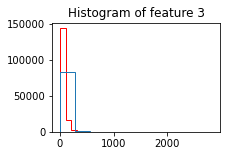

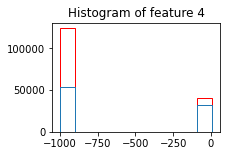

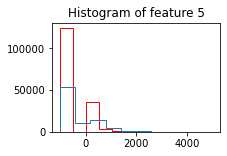

In [26]:
# histogram of some features
plt.figure(figsize=(3,2))
plt.hist(data_set[ind_y_neg,0], histtype = 'step', color = 'red')
plt.hist(data_set[ind_y_pos,0], histtype = 'step')
plt.title('Histogram of feature 0')
plt.show()

plt.figure(figsize=(3,2))
plt.hist(data_set[ind_y_neg,1], histtype = 'step', color = 'red')
plt.hist(data_set[ind_y_pos,1], histtype = 'step')
plt.title('Histogram of feature 1')
plt.show()

plt.figure(figsize=(3,2))
plt.hist(data_set[ind_y_neg,2], histtype = 'step', color = 'red')
plt.hist(data_set[ind_y_pos,2], histtype = 'step')
plt.title('Histogram of feature 2')
plt.show()

plt.figure(figsize=(3,2))
plt.hist(data_set[ind_y_neg,3], histtype = 'step', color = 'red')
plt.hist(data_set[ind_y_pos,3], histtype = 'step')
plt.title('Histogram of feature 3')
plt.show()

plt.figure(figsize=(3,2))
plt.hist(data_set[ind_y_neg,4], histtype = 'step', color = 'red')
plt.hist(data_set[ind_y_pos,4], histtype = 'step')
plt.title('Histogram of feature 4')
plt.show()

plt.figure(figsize=(3,2))
plt.hist(data_set[ind_y_neg,5], histtype = 'step', color = 'red')
plt.hist(data_set[ind_y_pos,5], histtype = 'step')
plt.title('Histogram of feature 5')
plt.show()

With these histograms, we see that some features have constinuous distribution while others have discrete distribution

In [27]:
# Counting the number of outliers for each feature
out = []
for i in range (data_set.shape[1]):
    ind = indices_outliers(data_set[:,i])
    out.append(len(ind))
print(out)

[49357, 1850, 14611, 13891, 0, 1176, 0, 644, 8632, 12289, 9566, 0, 0, 13925, 0, 0, 13434, 0, 0, 13299, 0, 10307, 0, 0, 0, 0, 0, 0, 0, 11153]


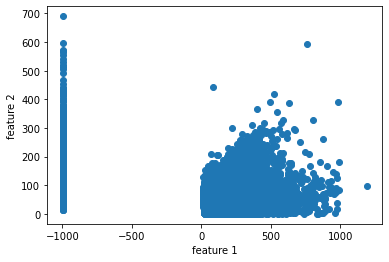

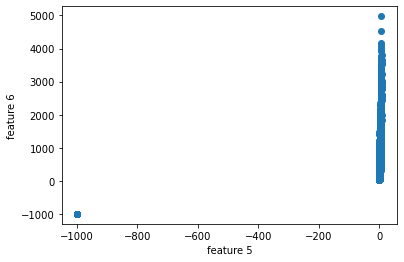

In [28]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(data_set[:,0], data_set[:,1])
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(data_set[:,4], data_set[:,5])
ax.set_xlabel('feature 5')
ax.set_ylabel('feature 6')
plt.show()

### Split and classify data

In [39]:
# Classification of the output
y_0, y_1, y_2, y_3 = y_classification(y, data_set)

In [40]:
#EDA for each class
class_0, class_1, class_2, class_3 = EDA_class(data_set)

In [41]:
# Set the "spliter" value correponding to the part dedicated for train
spliter = 0.8

# Split into a train and a test set
train_0, y_tr_0, test_0, y_te_0 = train_test_separator(y_0, class_0, spliter, seed)
train_1, y_tr_1, test_1, y_te_1 = train_test_separator(y_1, class_1, spliter, seed)
train_2, y_tr_2, test_2, y_te_2 = train_test_separator(y_2, class_2, spliter, seed)
train_3, y_tr_3, test_3, y_te_3 = train_test_separator(y_3, class_3, spliter, seed)

## Train part

#### Fitting class 0

In [98]:
MSE_loss = MSE()

##### Least Squares

In [100]:
mse, w_least_squares = least_squares(y_tr_0, train_0, MSE_loss)
print("train mse: " + str(mse))

train_pred = predict_labels(w_least_squares, train_0)
counting_errors(train_pred, y_tr_0)

test_pred = predict_labels(w_least_squares, test_0)
counting_errors(test_pred, y_te_0)

train mse: 0.39221156796442697
Numbers of errors :  22244  // Error accuracy [%] : % 27.829350681846616
Numbers of errors :  5588  // Error accuracy [%] : % 27.96376920382325


##### Least Squares Gradient Descent

In [105]:
initial_w = np.ones(train_0.shape[1])
mse, w_least_squares_GD = least_squares_GD(y_tr_0, train_0, MSE_loss, initial_w, max_iters = 1000, gamma = 0.000001)
print("train mse: " + str(mse))

train_pred = predict_labels(w_least_squares_GD, train_0)
counting_errors(train_pred, y_tr_0)

test_pred = predict_labels(w_least_squares_GD, test_0)
counting_errors(test_pred, y_te_0)

train mse: 12.180313127109066
Numbers of errors :  40812  // Error accuracy [%] : % 51.059677217565365
Numbers of errors :  10241  // Error accuracy [%] : % 51.24856127708553


#### Stochastic gradient

In [106]:
initial_w = np.ones(train_0.shape[1])
mse, w_least_squares_SGD = least_squares_SGD(y_tr_0, train_0, MSE_loss, initial_w, max_iters = 1000, gamma = 0.001, mini_batch_size=100)
print("train mse: " + str(mse))

train_pred = predict_labels(w_least_squares_SGD, train_0)
counting_errors(train_pred, y_tr_0)

test_pred = predict_labels(w_least_squares_SGD, test_0)
counting_errors(test_pred, y_te_0)

train mse: 1.409067895440594
Numbers of errors :  34851  // Error accuracy [%] : % 43.601901663955964
Numbers of errors :  8775  // Error accuracy [%] : % 43.912325476655155


#### Ridge regression

In [97]:
mse, w_ridge_regression = ridge_regression(y_tr_0, train_0, MSE_loss, 0.000000001)
print("train mse: " + str(mse))

train_pred = predict_labels(w_ridge_regression, class_0)
counting_errors(train_pred, y_0)

test_pred = predict_labels(w_ridge_regression, test_0)
counting_errors(test_pred, y_te_0)

train mse: 0.4085064268092323
Numbers of errors :  30343  // Error accuracy [%] : % 30.369421396615053
Numbers of errors :  6085  // Error accuracy [%] : % 30.450883250763148


#### Logistic regression with gradient descent

In [107]:
neg_log = Neg_log()

In [108]:
#replace the -1 output by 0 because our logistic regression is for y = {0, 1}
ind_y_tr_0_neg = np.array(np.where(y_tr_0 == -1)[0])
ind_y_te_0_neg = np.array(np.where(y_te_0 == -1)[0])
for i in (ind_y_tr_0_neg):
    y_tr_0[i] = 0
for i in (ind_y_te_0_neg):
    y_te_0[i] = 0

In [109]:
initial_w = np.zeros(train_0.shape[1])
mse, w_log_reg_GD = logistic_regression(y_tr_0, train_0, neg_log, initial_w)
print("train mse: " + str(mse))

train_pred = predict_labels(w_log_reg_GD, train_0)
counting_errors(train_pred, y_tr_0)

test_pred = predict_labels(w_log_reg_GD, test_0)
counting_errors(test_pred, y_te_0)

C:\Users\hacker ntm\Desktop\Cours\ML\Project 1\scripts\losses.py:64: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(t))
C:\Users\hacker ntm\Desktop\Cours\ML\Project 1\scripts\losses.py:72: RuntimeWarning: divide by zero encountered in log
  loss = -(y.T.dot(np.log(sigma)) + (1 - y).T.dot(np.log(1 - sigma)))


train mse: nan
Numbers of errors :  62408  // Error accuracy [%] : % 78.07831852871261
Numbers of errors :  15585  // Error accuracy [%] : % 77.99129259870891


#### Cross-Validation

In [42]:
MSE_loss = MSE()

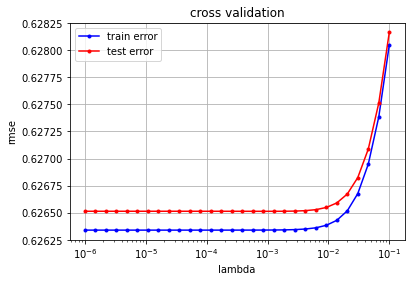

In [90]:
lambdas_ = np.logspace(-6, -1, 30)
cross_validation_plot(y_0, class_0, MSE_loss, ridge_regression, lambdas_)

##### Cross validation fonctionne pour une seule step avec ridge mais dès que je la mets comme method dans le code du dessus ça ne fonctionne pas. Je ne comprends pas pourquoi. 
##### Aussi je ne suis pas sûre de quel set utiliser: train_0 ou class_0? 

In [ ]:
### seed = 1
k_fold = 4
method = ridge_regression
k = 2
initial_w = np.zeros(class_0.shape[1])
# split data in k fold
k_indices = build_k_indices(y_0, k_fold, seed)
loss_tr, loss_te = cross_validation(y_0, class_0, k_indices, k, method, initial_w) 

#### Fitting class 1

#### Least Squares

In [ ]:
mse, w_least_squares = least_squares(train_truth, train_set)
print("train mse: " + str(mse))

train_pred = predict_labels(w_least_squares, train_set)
counting_errors(train_pred, train_truth)

test_pred = predict_labels(w_least_squares, test_set)
counting_errors(test_pred, test_truth)

#### Least Squares Gradient Descent

In [ ]:
initial_w = np.ones(train_set.shape[1])
mse, w_least_squares_GD = least_squares_GD(train_truth, train_set, initial_w, max_iters = 100, gamma = 0.000001)
print("train mse: " + str(mse))

train_pred = predict_labels(w_least_squares_GD, train_set)
counting_errors(train_pred, train_truth)

test_pred = predict_labels(w_least_squares_GD, test_set)
counting_errors(test_pred, test_truth)

#### Stochastic gradient

In [ ]:
initial_w = np.ones(train_set.shape[1])
mse, w_least_squares_SGD = stochastic_gradient_descent(train_truth, train_set, initial_w, max_iters = 50, gamma = 0.001, batch_size=100)
print("train mse: " + str(mse))

train_pred = predict_labels(w_least_squares_SGD, train_set)
counting_errors(train_pred, train_truth)

test_pred = predict_labels(w_least_squares_SGD, test_set)
counting_errors(test_pred, test_truth)

#### Ridge regression


In [ ]:
mse, w_least_squares_SGD = ridge_regression(train_truth, train_set, 0.001)
print("train mse: " + str(mse))

train_pred = predict_labels(w_least_squares_SGD, train_set)
counting_errors(train_pred, train_truth)

test_pred = predict_labels(w_least_squares_SGD, test_set)
counting_errors(test_pred, test_truth)

#### Logistic regression with gradient descent

In [ ]:
initial_w = np.zeros(train_set.shape[1])
mse, w_log_reg_GD = logistic_regression_GD(train_truth, train_set, initial_w, 0.01, 100)
print("train mse: " + str(mse))

train_pred = predict_labels(w_log_reg_GD, train_set)
counting_errors(train_pred, train_truth)

test_pred = predict_labels(w_log_reg_GD, test_set)
counting_errors(test_pred, test_truth)

#### Cross-Validation

In [ ]:
seed = 1
k = 2
k_indices = build_k_indices(train_truth, k_fold, seed)
initial_w = np.zeros(train_set.shape[1])
loss_tr, loss_te = cross_validation(train_truth, train_set, k_indices, k, least_squares_GD, initial_w)

In [ ]:
print('training loss : ' + str(loss_tr))
print('testing loss : ' + str(loss_te))

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = "../data/test.csv"
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
_.shape, tX_test.shape, ids_test.shape

In [ ]:
'''choose the w we want to use for the submission and the tX_test'''
weights = w_least_squares_GD

In [ ]:
OUTPUT_PATH = '../data/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)